This Project contains two models - first is of MP Neuron and Second is Perceptron model used for same dataset of breast cancer. These two models are binary classifiers which classifies a sample of person into 'Malignant' or 'Benign'.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from random import randint

%matplotlib inline

In [ ]:
b_cancer = load_breast_cancer()

In [ ]:
b_cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [ ]:
b_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
b_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
b_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
b_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
X = b_cancer.data
print(X.shape)

(569, 30)


In [ ]:
Y = b_cancer.target
print(Y.shape)

(569,)


In [ ]:
data = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
data['class'] = b_cancer.target
data['class'].value_counts()


1    357
0    212
Name: class, dtype: int64

In [ ]:
X = data.drop('class', axis = 1)
Y = data['class']
print(X)
print(Y)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]
0      0
1      0
2      0
3      0
4      0
      

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)
print("X_train Dimensions:", X_train.shape)
print("X_test Dimensions:", X_test.shape)
print("Y_train Dimensions:", Y_train.shape)
print("Y_test Dimensions:", Y_test.shape)

X_train Dimensions: (512, 30)
X_test Dimensions: (57, 30)
Y_train Dimensions: (512,)
Y_test Dimensions: (57,)


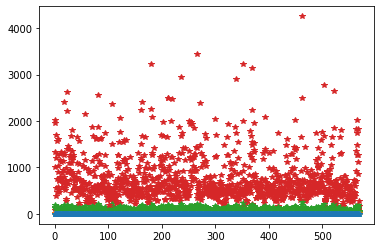

In [ ]:
plt.plot(data, '*')
plt.show()

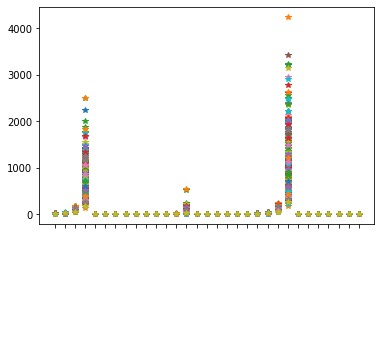

In [ ]:
plt.plot(data.T, '*')
plt.xticks(rotation='vertical', color = 'w')
plt.show()

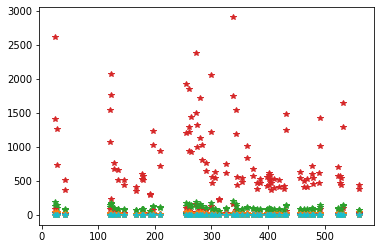

In [ ]:
plt.plot(X_test, '*')
plt.show()

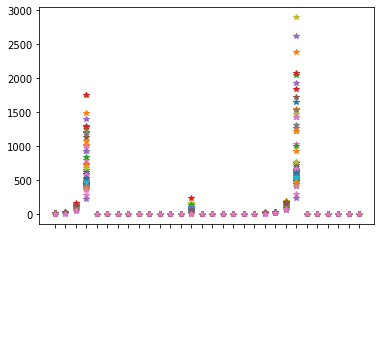

In [ ]:
plt.plot(X_test.T, '*')
plt.xticks(rotation='vertical', color = 'w')
plt.show()

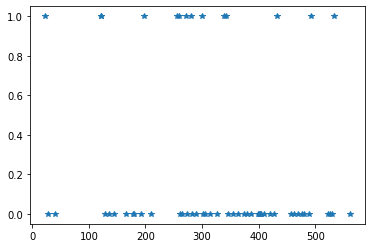

In [ ]:
testing_bin = X_test['mean area'].map(lambda x: 0 if x < 1000 else 1)
plt.plot(testing_bin, '*')
plt.show()

In [ ]:
X_bin_train = X_train.apply(pd.cut, bins = 2, labels = [1, 0]).values
X_bin_test = X_test.apply(pd.cut, bins = 2, labels = [1, 0]).values
print("Binarized X_train:\n", X_bin_train)
print("Binarized X_test:\n", X_bin_test)

Binarized X_train:
 [[1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 1 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 1 0 ... 0 1 1]]
Binarized X_test:
 [[1 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 0 1]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


# MP Neuron Model

For finding Optimized theta in Training Set

{0: 0.626953125, 1: 0.626953125, 2: 0.626953125, 3: 0.626953125, 4: 0.626953125, 5: 0.626953125, 6: 0.626953125, 7: 0.626953125, 8: 0.626953125, 9: 0.626953125, 10: 0.626953125, 11: 0.626953125, 12: 0.626953125, 13: 0.626953125, 14: 0.630859375, 15: 0.6328125, 16: 0.642578125, 17: 0.6484375, 18: 0.65625, 19: 0.6640625, 20: 0.671875, 21: 0.6875, 22: 0.701171875, 23: 0.724609375, 24: 0.755859375, 25: 0.78515625, 26: 0.818359375, 27: 0.845703125, 28: 0.849609375, 29: 0.814453125, 30: 0.759765625}
Optimized value of Theta in Training Set: 28
With Accuracy of:  84.9609375


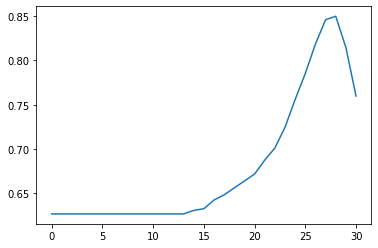

In [ ]:
Accuracy = []
Theta_Accs = {}
for theta in range(X.shape[1] + 1):
    Y_pred_train = []
    for x, y in zip(X_bin_train, Y_train):
        Y_pred = (np.sum(x) >= theta)
        Y_pred_train.append(Y_pred)

    accuracy = accuracy_score(Y_train, Y_pred_train)
    Theta_Accs[theta] = accuracy
    Accuracy.append(accuracy)    
    
print(Theta_Accs)
Optimized_theta = max(Theta_Accs, key = Theta_Accs.get)
print("Optimized value of Theta in Training Set:", Optimized_theta)
print("With Accuracy of: ", 100*Theta_Accs.get(Optimized_theta))

plt.plot(Accuracy)
plt.show()

Performance of Optimized theta in Testing dataset

In [ ]:
Y_pred_test = []
theta = 28
for x, y in zip(X_bin_test, Y_test):
    Y_pred = (np.sum(x) >= theta)
    Y_pred_test.append(Y_pred)
    
accuracy = accuracy_score(Y_test, Y_pred_test)
print("Accuracy: ", 100*accuracy)

Accuracy:  78.94736842105263


# Perceptron Model

In [ ]:
class MLP:
    def __init__(self):
        self.w = None
        self.b = None
 
    def model(self, x):
        
        if np.dot(self.w, x) >= self.b:
            return 1
        return 0    
 
    def predict(self, X):
       # X = np.array(X)
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
 
        return np.array(Y)
 
    def fit(self, X, Y, epochs, eta):
       # X = np.array(X) 
        self.w = np.ones(X.shape[1])
        self.b = 0
        accs = []
        max_accuracy = 0
        W = []
        for i in range(epochs):
            for x, y in zip(X, Y):
                #x = int(x)
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
            
                    self.w = self.w + x*eta
                    self.b = self.b - 1*eta
 
                if y == 0 and y_pred == 1:
                
                    self.w = self.w - x*eta
                    self.b = self.b + 1*eta
 
            W.append(self.w)
            accs.append(accuracy_score(Y, self.predict(X)))
            if accs[i] > max_accuracy:
                max_accuracy = accs[i]
                saved_w = self.w
                saved_b = self.b
            self.w = saved_w
            self.b = saved_b
 
        print(accs)
        print("Maximum Accuracy of Model:",100*max_accuracy)
            
        return np.array(W)

In [ ]:
perceptron = MLP()
W_train = perceptron.fit(X_train.values, Y_train, 100, 1)
Y_pred_train = perceptron.predict(X_train.values)
print("\nWeights for Training Set :\n", W_train)
print("\nAccuracy of Training model: ",100*accuracy_score(Y_train, Y_pred_train))

[0.373046875, 0.91015625, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875, 0.373046875,

In [ ]:
W_test = perceptron.fit(X_bin_test, Y_test, 100, 0.03)
Y_pred_test = perceptron.predict(X_bin_test)
print("\nWeights for Testing Set :\n", W_test)
print("\nAccuracy of Testing model: ",100*accuracy_score(Y_test, Y_pred_test))

[0.631578947368421, 0.7543859649122807, 0.9122807017543859, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 

We have seen that on same dataset, MP Neuron generates accuracy of near about 79% and Perceptron generates the accuracy of 96.5% which is a great difference and shows learning yeilds great results. :)

Ideal Perceptron Model

In [ ]:
per_clf = Perceptron()
per_clf.fit(X_train, Y_train)
Y_pred_test = per_clf.predict(X_test)
print(Y_pred_test)
print("\nAccuracy:",100*accuracy_score(Y_test, Y_pred_test))

[1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1]

Accuracy: 92.98245614035088
